# [0] Marine Protected Areas

### Consider a population of crabs living along a strip of coastline (essentially a 1D environment), who move about randomly throughout their life. We can approximate the environment as a discrete 1D array of L spatial sites. We can simulate the daily movement of the crabs as a discrete-time random walk, in which each crab moves one site north along the coast with probability a/2, moves one site south along the coast with probability a/2, and stays put with probability 1-a. These crabs reproduce exponentially (and continuously, ie no breeding season) at rate such that at each time step each crab produces a single new crab with probability r.

### These crabs are over-harvested and to protect them a marine protected area (MPA) is being planned. The MPA will be M sites long (M<=L). We will assume the crabs are perfectly protected (no mortality) inside the MPA, but outside the MPA harvesting results in a 100% mortality rate.

### a) Use a Lagrangian-style random walk model to simulate the population described above, with parameter values: r = 0.001, a=0.5. Make two plots of the total population size as a function of time: one with M=20 and one with M=80.



In [105]:
#imports 

import numpy as np
import matplotlib.pyplot as plt
import random

Text(0.5, 0.05, 'L = 100, initial number of crabs = 200')

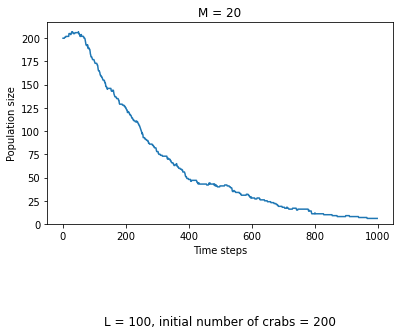

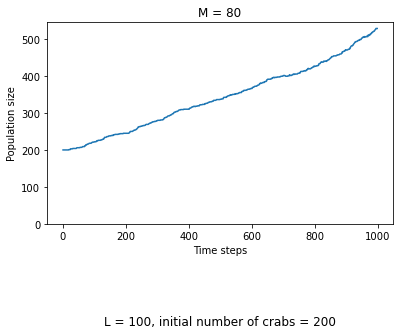

In [149]:
#parameter values

alpha = 0.5
r = 0.001
num_crabs = 200
L = 100
num_time_steps = 1000
M = 20 

############# Lagrangian way ############

def lagrange(alpha, r, num_crabs, L, num_time_steps,M):
    """for a given alpha (probability of moving), r (reproduction rate), # of crabs, L (size of habitat) & MPA size, """
    """show how population size changes with time using Lagrange method"""
    
    #throw error if M>L
    if M>L:
        print("M should be <= L")
        return
    
    #array for location of each crab
    x_over_time = np.zeros((num_crabs))
    
    #randomly assign locations to all crabs
    x_over_time = np.random.choice(L,num_crabs)
    
    #if we want all crabs to be at the center of the  MPA at the start
    x_over_time = np.full(num_crabs,int(np.floor(L/2)))
    
    #population size
    pop_size = np.zeros((num_time_steps))
    pop_size[0] = num_crabs


    #adding MPA to the center of the habitat
    mpa_start = int(np.floor(L/2 - M/2))
    mpa_end = mpa_start + M 

    for t in range(num_time_steps-1):
    
        #random walk
        steps = np.random.choice([-1,0,1],(len(x_over_time),1),p=[alpha/2,1-alpha,alpha/2])
        
        #adding random walk to previous location
        x_over_time_next = x_over_time + steps[:,0]
        
        #determine if x is outside mpa
        outside_mpa = (x_over_time_next < mpa_start) | (x_over_time_next > mpa_end)
        
        # if the crab is outside mpa, make them nan in the next time step
        x_over_time_next=x_over_time_next.astype('float')
        x_over_time_next[outside_mpa] = np.nan 
        
        #number of new crabs - binomial distribution
        new_crabs = np.random.binomial(pop_size[t],r)
        x_new = np.zeros(new_crabs,dtype = np.float64)
        
        #randomly assign locations to new crabs
        #x_new = np.random.choice(L,new_crabs) #the population grows/crashes more slowly in this case
        
        #assign new crabs to center of mpa
        x_new = np.full(new_crabs,int(np.floor(L/2)))
        
        #append it to the original array
        x_over_time_next = np.append(x_over_time_next,x_new)
        
        # count number of non nans
        pop_size[t+1] = (~np.isnan(x_over_time_next)).sum(0)
        
        x_over_time = x_over_time_next
        
    return(pop_size)
        
        
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.4, 0.8, 0.7))
ax1.set_xlabel('Time steps')
ax1.set_ylabel('Population size')
ax1.set_title('M = ' +str(M))
ax1.plot(range(num_time_steps), lagrange(alpha, r, num_crabs, L, num_time_steps,M))
plt.ylim(bottom = 0) 
txt="L = " + str(L) + ", initial number of crabs = " + str(num_crabs)
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

M=80

fig = plt.figure()
ax2 = fig.add_axes((0.1, 0.4, 0.8, 0.7))
ax2.set_xlabel('Time steps')
ax2.set_ylabel('Population size')
ax2.set_title('M = ' +str(M))
ax2.plot(range(num_time_steps), lagrange(alpha, r, num_crabs, L, num_time_steps,M))
plt.ylim(bottom = 0) 
txt="L = " + str(L) + ", initial number of crabs = " + str(num_crabs)
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)










### b) Repeat part 1 using a Eulerian-style model.

Text(0.5, 0.05, 'L = 100, initial number of crabs = 200')

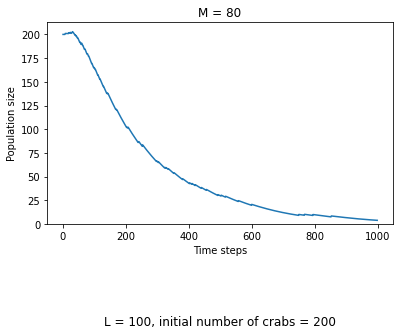

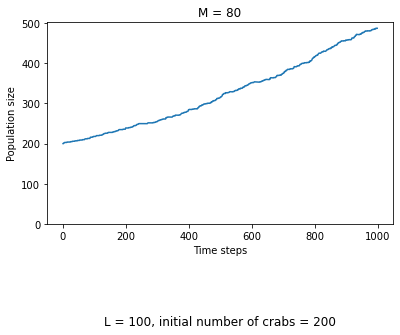

In [148]:
#parameter values

alpha = 0.5
r = 0.001
num_crabs = 200
L = 100
num_time_steps = 1000
M = 80


########################
### run Euler way
########################

def euler(alpha, r, num_crabs, L, num_time_steps,M):
    """for a given alpha (probability of moving), r (reproduction rate), # of crabs, L (size of habitat) & MPA size, """
    """show how population size changes with time using Euler method"""
    #create array to store number of crabs at each site
    density_crabs = np.zeros(L)

    #start with all crabs at the center
    density_crabs[int(np.floor(L/2))] = num_crabs

    #start with all crabs randomly assigned locations
    #density_crabs[int(np.floor(L/2))] = np.random.choice(num_crabs,L)

    #population size
    pop_size = np.zeros((num_time_steps))
    pop_size[0] = num_crabs

    for t in range(num_time_steps-1):
        #number of crabs that will stay, move left or move right
        stay = (1-alpha)*density_crabs
        left = alpha*density_crabs/2
        right = alpha*density_crabs/2

        #new density of crabs
        density_crabs = stay + np.roll(left,-1) + np.roll(right,1)



        #adding MPA to the center of the habitat
        mpa_start = int(np.floor(L/2 - M/2))
        mpa_end = mpa_start + M 

        #set density outside mpa to 0
        density_crabs[0:mpa_start] = 0
        density_crabs[mpa_end:L] = 0



        #new crabs with probability r (number of new crabs - binomial distribution)
        new_crabs = np.random.binomial(pop_size[t],r)

        #add new crabs to the center (if they were randomly assigned it would probably change the dynamics)
        density_crabs[int(np.floor(L/2))] = density_crabs[int(np.floor(L/2))] + new_crabs

        #population size
        pop_size[t+1] = density_crabs.sum()
    
    return(pop_size)
    
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.4, 0.8, 0.7))
ax1.set_xlabel('Time steps')
ax1.set_ylabel('Population size')
ax1.set_title('M = ' +str(M))
ax1.plot(range(num_time_steps),euler(alpha, r, num_crabs, L, num_time_steps,20))
plt.ylim(bottom = 0) 
txt="L = " + str(L) + ", initial number of crabs = " + str(num_crabs)
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

fig = plt.figure()
ax2 = fig.add_axes((0.1, 0.4, 0.8, 0.7))
ax2.set_xlabel('Time steps')
ax2.set_ylabel('Population size')
ax2.set_title('M = ' +str(M))
ax2.plot(range(num_time_steps),euler(alpha, r, num_crabs, L, num_time_steps,80))
plt.ylim(bottom = 0) 
txt="L = " + str(L) + ", initial number of crabs = " + str(num_crabs)
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

### c) Briefly contrast your models from parts A and B. Which is faster? Which makes more sense to you? Which was easier to code?

In [157]:
import time

alpha = 0.5
r = 0.001
num_crabs = 200
L = 100
num_time_steps = 5000
M = 80


startTime = time.time()

lagrange(alpha, r, num_crabs, L, num_time_steps,M)

executionTime = (time.time() - startTime)
print('Execution time in seconds for Lagrangian method: ' + str(executionTime))

startTime = time.time()

euler(alpha, r, num_crabs, L, num_time_steps,M)

executionTime = (time.time() - startTime)
print('Execution time in seconds for Euler method: ' + str(executionTime))

Execution time in seconds for Lagrangian method: 50.647040128707886
Execution time in seconds for Euler method: 0.5694875717163086


#### Euler-style model is orders of magnitude faster to run when number of time steps increase. Lagrangian style model is slightly easier to understand but Euler style model was easier to code when you include reproduction and harvesting.

### d) Use either of your models to find a minimal size of the MPA (M_c), below which the population is not sustainable. Give some details of how to got to this estimate. (Use the same values for r and a as above.)

#### I calculate the change in population per time step to be $\frac{end\ population}{beginning\ population}^{\frac{1}{Time steps}} -1$. The value of M for which this change in population changes from negative to positive is what I call M_c.

Text(0.5, 0.05, 'L = 100, initial number of crabs = 200')

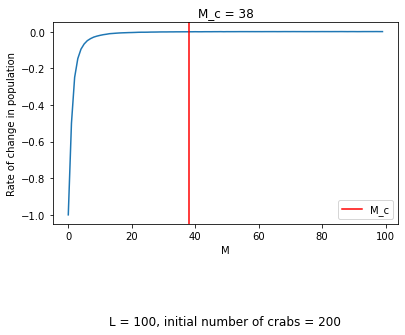

In [185]:
alpha = 0.5
r = 0.001
num_crabs = 200
L = 100
num_time_steps = 5000

M_range = range(0,100)
pop_change = np.zeros(100)


for M in M_range:
    
    population = euler(alpha, r, num_crabs, L, num_time_steps,M)
    pop_change[int(M)] = (population[num_time_steps-1]/num_crabs)**(1/num_time_steps) -1
    if (pop_change[int(M)-1] < 0) & (pop_change[int(M)] >= 0):
        M_c = M
        


    
fig = plt.figure()
ax2 = fig.add_axes((0.1, 0.4, 0.8, 0.7))
ax2.set_xlabel('M')
ax2.set_ylabel('Rate of change in population')
ax2.set_title('M_c = ' +str(M_c))
ax2.plot(M_range, pop_change)
ax2.axvline(M_c, color = 'red', label = "M_c")
plt.legend() 
txt="L = " + str(L) + ", initial number of crabs = " + str(num_crabs)
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

### e) Discuss the relationship between a mean first passage time and the reproductive rate in determining M_c

#### If the reproductive rate increases, the average time it takes for the population to become unsustainable will increase.

#### When the reproductive rate is fixed, M_c increases with number of time steps. 

### f) Bonus: Now let α vary. Can you determine M_c as a function of a? 

Text(0.5, 0.05, 'L = 100, initial number of crabs = 200')

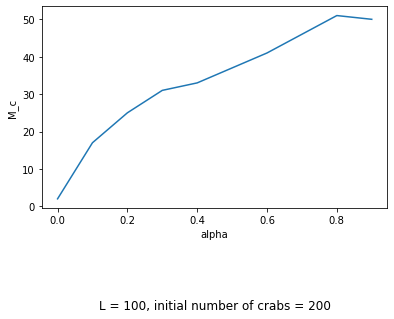

In [198]:
alpha = 0.5
r = 0.001
num_crabs = 200
L = 100
num_time_steps = 500

M_range = range(0,100)
alpha_range = np.arange(0,1,0.1)
pop_change = np.zeros(100)
M_c_as_a_function_of_alpha = np.zeros(10)

for a in alpha_range:
    
    for M in M_range:

        population = euler(a, r, num_crabs, L, num_time_steps,M)
        pop_change[int(M)] = (population[num_time_steps-1]/num_crabs)**(1/num_time_steps) -1
        if (pop_change[int(M)-1] < 0) & (pop_change[int(M)] >= 0):
            M_c = M
            break
    M_c_as_a_function_of_alpha[int(a*10)] = M_c
        


    
fig = plt.figure()
ax2 = fig.add_axes((0.1, 0.4, 0.8, 0.7))
ax2.set_xlabel('alpha')
ax2.set_ylabel('M_c')
ax2.plot(alpha_range, M_c_as_a_function_of_alpha)
txt="L = " + str(L) + ", initial number of crabs = " + str(num_crabs)
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

### g) For fun: Now let a and r vary. Can you determine M_c as a function of a and r? 